In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# data prep

df = pd.read_csv('../data/iris.csv')
df = df.drop('Species', axis=1)
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
#data standardization

scaler = StandardScaler()
result = scaler.fit_transform(df)
df_scaled = pd.DataFrame(result, columns= df.columns)
df_scaled.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [6]:
# clustering

model = KMeans (n_clusters=3, n_init=10, random_state=123)
model.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [8]:
# check clustering results

model.cluster_centers_
model.labels_
model.inertia_

139.8204963597497

In [10]:
# dimention reduction
pca = PCA(n_components=2)
transform = pca.fit_transform(df_scaled) # reduce ti 2 dimensions
transform = pd.DataFrame(transform)
transform['cluster'] = model.labels_ # add cluster info
transform.head()

,0,1,cluster
0,-2.264703,0.480027,1
1,-2.080961,-0.674134,1
2,-2.364229,-0.341908,1
3,-2.299384,-0.597395,1
4,-2.389842,0.646835,1


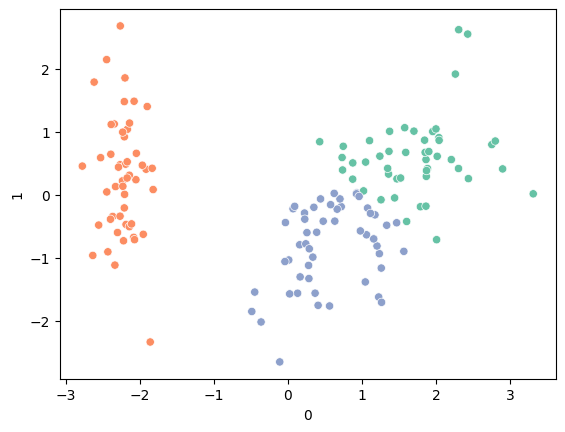

In [11]:
# visualization
sns.scatterplot(
    data=transform,
    x=0,
    y=1,
    hue='cluster',
    palette='Set2',
    legend=False
)

plt.show()

# CODE 12-3


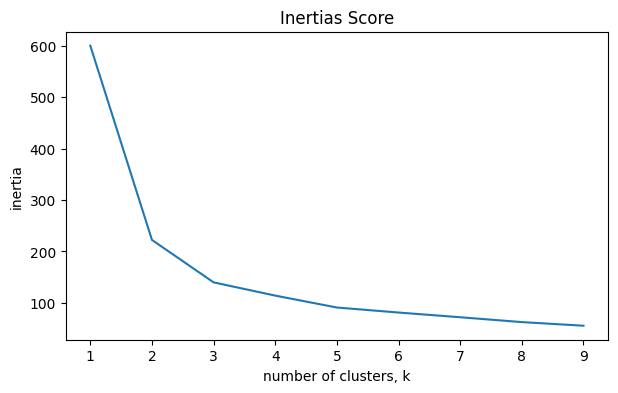

In [ ]:
ks = range(1,10) # number of clusters
inertias = pd.Series([]) # clustering evaluation results

for k in ks:
    model = KMeans(n_clusters= k, n_init=10, random_state=123)
    model.fit(df_scaled)
    inertias.loc[k] = model.inertia_
    
plt.figure(figsize=(7,4))
inertias.plot.line(title = 'Inertias Score',
                   xlabel= 'number of clusters, k',
                   ylabel= 'inertia')

plt.show()